In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import rcParams

%matplotlib inline 
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [27]:
df = pd.read_csv('/Users/TMRNEW/Documents/All_DS_Python_stuff/kc_house_data.csv')
df.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [28]:
df.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [29]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [30]:
df = df[['id','date','price','bedrooms','bathrooms','sqft_living','sqft_lot','yr_built']]
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1955
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,1951
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1933
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1965
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1987
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,2001
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,1995
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1963
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1960
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2003


In [31]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1971.005136
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,29.373411
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1900.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1951.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1975.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,1997.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,2015.000000


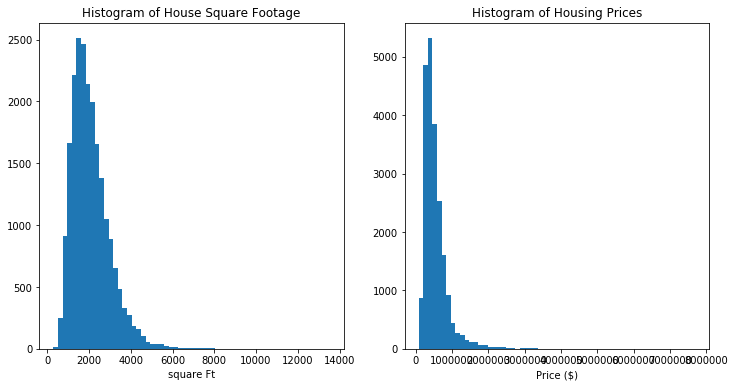

In [32]:
fig = plt.figure(figsize=(12, 6))
sqft = fig.add_subplot(121)
cost = fig.add_subplot(122)

sqft.hist(df.sqft_living, bins=60)
sqft.set_xlabel('square Ft')
sqft.set_title("Histogram of House Square Footage")

cost.hist(df.price, bins=60)
cost.set_xlabel('Price ($)')
cost.set_title("Histogram of Housing Prices")

plt.show()

In [33]:

import statsmodels.api as sm
from statsmodels.formula.api import ols


In [34]:
#ordinary least squares regression model
m = ols('price ~ sqft_living',df).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Thu, 14 Feb 2019   Prob (F-statistic):               0.00
Time:                        00:33:57   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      

In [35]:
#significant relationship between square footage and housing prices since there is 
#an extremely high t-value of 144.920, and a P>|t| of 0%–which essentially means that 
#this relationship has a near-zero chance of being due to statistical variation or chance.



In [36]:
#adding more independent variables
m = ols('price ~ sqft_living + bedrooms + bathrooms + yr_built' ,df).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     6619.
Date:                Thu, 14 Feb 2019   Prob (F-statistic):               0.00
Time:                        00:34:08   Log-Likelihood:            -2.9896e+05
No. Observations:               21613   AIC:                         5.979e+05
Df Residuals:                   21608   BIC:                         5.980e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.024e+06    1.3e+05     46.356      

In [37]:
#R-Squared is higher, meaning we can explain 55.1% of the 
#variation in the model now with addition of bedrooms and bathrooms

c:\users\tmrnew\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


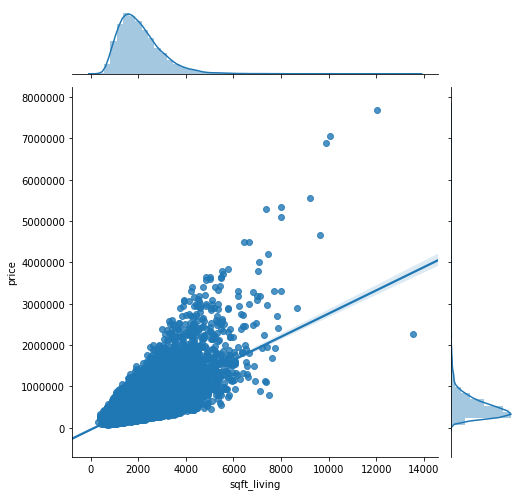

In [38]:
sns.jointplot(x="sqft_living", y="price", data=df, kind = 'reg',fit_reg= True, height = 7)
plt.show()

In [58]:
#NEXT TUTORIAL USING SKLEARN******************
#***************************************************
#*******************************************
#************************************
#*****************************
#***********************
#******************
#*************

In [40]:
from sklearn import linear_model


In [42]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1955
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,1951
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1933
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1965
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1987


In [43]:
df.bedrooms.median()

3.0

In [44]:
df['bedrooms'].median()

3.0

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 8 columns):
id             21613 non-null int64
date           21613 non-null object
price          21613 non-null float64
bedrooms       21613 non-null int64
bathrooms      21613 non-null float64
sqft_living    21613 non-null int64
sqft_lot       21613 non-null int64
yr_built       21613 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 1.2+ MB


In [47]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1971.005136
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,29.373411
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1900.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1951.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1975.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,1997.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,2015.000000


In [49]:
#fill null values with median value

df.bedrooms.fillna(df.bedrooms.median())
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1955
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,1951
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1933
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1965
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1987
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,2001
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,1995
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1963
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1960
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2003


In [50]:
df.bedrooms.median()

3.0

In [51]:
#linear regression begins

reg = linear_model.LinearRegression()
reg.fit(df[['sqft_living','bedrooms','yr_built']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
reg.coef_

array([   340.47444834, -60408.38064393,  -2415.93595633])

In [53]:
#linear regression equation - price = 340*sqft_living + -60408*bedrooms + -2415*yr_built + b
#b is intercept

reg.intercept_



4797384.687998763

In [57]:
#now we can predict prices of homes
#predict price of home that's 3000 sqft, 3 bedrooms and year built is 1990

reg.predict([[3000,3,2000]])

array([805710.97843031])